In [1]:
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('CarBuyers.csv')

In [ ]:
filtered=data.loc[(data['Fuel']=='petrol')| (data['Fuel']=='diesel')]

Ik zoek alleen op Petrol en Diesel omdat er een foute tussen zitten genaamd automatic en dat is geen brandstoftype.

In [24]:
filteredManu=data.loc[(data['Manufacturer']=='Audi')| (data['Manufacturer']=='Volkswagen')| (data['Manufacturer']=='BMW')]

Ik filter hier op 3 bekende automerken om zo een overzichtelijke tabel te kunnen maken omdat er anders veel te veel merken zijn de tabel onleesbaar wordt.

In [25]:
filtered.head()

,Manufacturer,Model,Price,Transmission,Power,Engine CC,Fuel,Male,Female,Unknown,Total
0,Ford,Focus,30.619322,5.966102,94.033898,1497.169492,petrol,814172,422731,"56,487",1293390
1,Ford,Fiesta,18.532143,5.714286,68.571429,1166.142857,petrol,554879,631666,"54,057",1240602
2,Volkswagen,Golf,31.242154,6.164835,89.461538,1537.406593,petrol,483216,310604,"47,563",841383
3,Renault,Clio,22.100000,5.615385,75.576923,1219.653846,petrol,241287,312556,"28,004",581847
4,BMW,320i,47.848370,6.444444,126.111111,1995.777778,petrol,408016,115843,"29,125",552984


<AxesSubplot:>

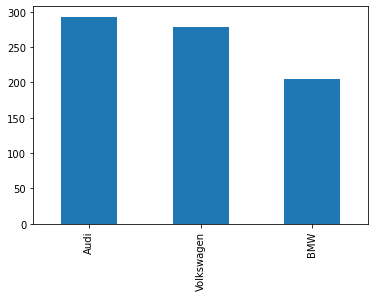

In [26]:
filteredManu['Manufacturer'].value_counts().plot(kind='bar')

<AxesSubplot:>

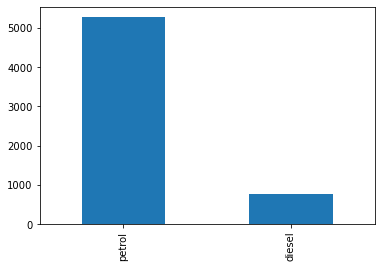

In [27]:
filtered['Fuel'].value_counts().plot(kind='bar')

Ik verwacht correlatie tussen deze twee categorische kolommen omdat deze 3 automerken veel verkocht worden denk ik dat daarom een groot aandeel van alle dieselauto's door deze merken verkocht wordt.

In [31]:
contingencyTable = data.groupby([filteredManu['Manufacturer'],filtered['Fuel']]).size().unstack('Manufacturer', fill_value=0)
contingencyTable

Manufacturer,Audi,BMW,Volkswagen
Fuel,,,
diesel,35,17,49
petrol,258,187,229


<AxesSubplot:xlabel='Fuel'>

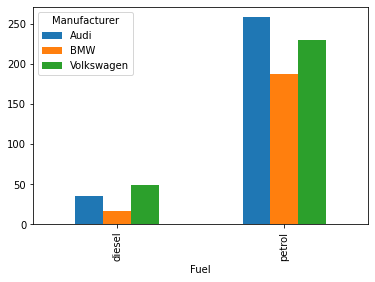

In [29]:
contingencyTable.plot(kind='bar')

Dit is niet wat ik van tevoren had bedacht, ik dacht dat deze veelverkochte merken een stuk meer diesel auto's zouden verkopen per x aantal verkochte benzine auto's. Audi verkoopt meer benzine auto's dan volkswagen maar dan weer minder diesel auto's dan Volkswagen. Er is dus correlatie tussen een bepaald automerk en de verkoop van dieselauto's.

In [32]:
from scipy.stats import chi2_contingency
chi2_contingency(contingencyTable)

(9.455419317599254,
 0.008846709838032554,
 2,
 array([[ 38.18451613,  26.58580645,  36.22967742],
        [254.81548387, 177.41419355, 241.77032258]]))

VRAGEN AAN DOCENT